In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from helpers import utils
import app.transform_eurostat as eurostat

In [14]:
file_path = utils.get_project_path('data', 'raw', 'eurostat', 'UK.csv')
df = (
    eurostat.read_datafile(file_path)
    .reset_index()
    .rename(columns={'index': 'ds', 'UK': 'y'})
)
df.head()

INFO:app.transform_eurostat:Parsing UK


,ds,y
0,2017-09-01,NaN
1,2017-08-01,NaN
2,2017-07-01,NaN
3,2017-06-01,25255767.0
4,2017-05-01,23581805.0


In [27]:
train = (df.copy().loc[(df.ds >= '2013-01-01') & (df.ds <= '2015-12-31')])
test = (df.copy().loc[df.ds >= '2016-01-01'])

In [28]:
m = Prophet()
m.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [29]:
future = m.make_future_dataframe(periods=12, freq='MS')
future.tail()

,ds
43,2016-08-01
44,2016-09-01
45,2016-10-01
46,2016-11-01
47,2016-12-01


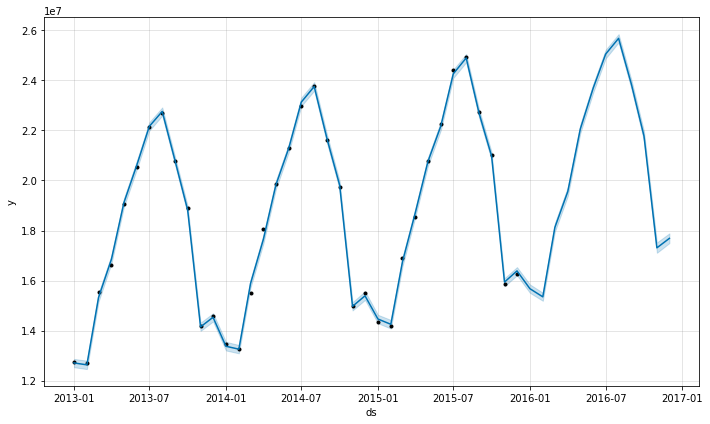

In [31]:
fcst = m.predict(future)
m.plot(fcst);

In [32]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2016-08-01,2.568088e+07,2.551710e+07,2.584866e+07
44,2016-09-01,2.383289e+07,2.364695e+07,2.400808e+07
45,2016-10-01,2.177771e+07,2.158653e+07,2.196759e+07
46,2016-11-01,1.730888e+07,1.711076e+07,1.752439e+07
47,2016-12-01,1.768730e+07,1.749832e+07,1.788784e+07


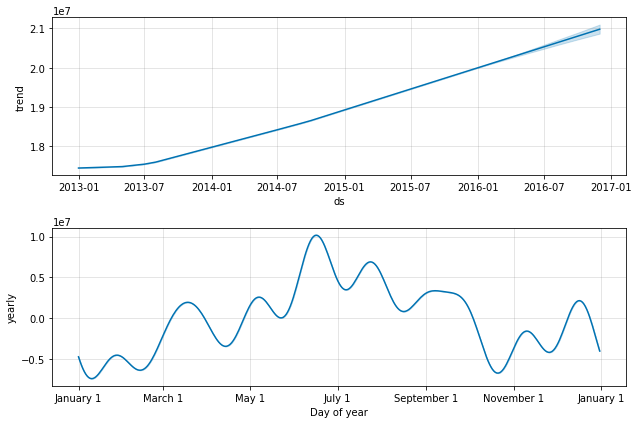

In [34]:
m.plot_components(fcst);